In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from stats import dm_test
import warnings
warnings.filterwarnings("ignore")

In [3]:
params = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_NORM_FINAL.csv')
params_t = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_STUD_FINAL.csv')

In [4]:
params.set_index(pd.to_datetime(params.iloc[:, 0]), inplace = True)
params = params.iloc[:, 1:]
params_t.set_index(pd.to_datetime(params_t.iloc[:, 0]), inplace = True)
params_t = params_t.iloc[:, 1:]

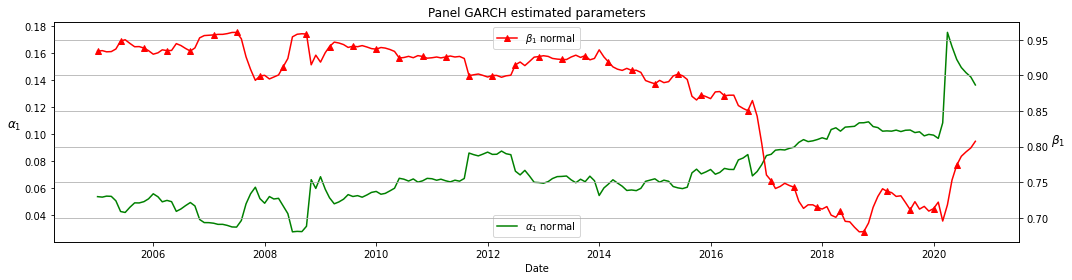

In [169]:
fig, ax1 = plt.subplots(figsize = (15,4))

ax2 = ax1.twinx()
ax1.plot(pd.to_datetime(params.index), params.Alpha, label = r'$\alpha_1$ normal', color = 'g')
ax2.plot(pd.to_datetime(params.index), params.Beta, label = r'$\beta_1$ normal', color = 'r', marker = '^', markevery = 5)

ax1.set_xlabel('Date')
ax1.set_ylabel(r'$\alpha_1$', rotation=0, fontsize=12, labelpad=10)
ax2.set_ylabel(r'$\beta_1$', rotation=0, fontsize=12, labelpad=10)
ax1.legend(loc = 'lower center')
ax2.legend(loc = 'upper center')
plt.title('Panel GARCH estimated parameters')
plt.grid(True)
plt.tight_layout()
#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panel_garch_norm_est_pars.png')
plt.show()

No handles with labels found to put in legend.


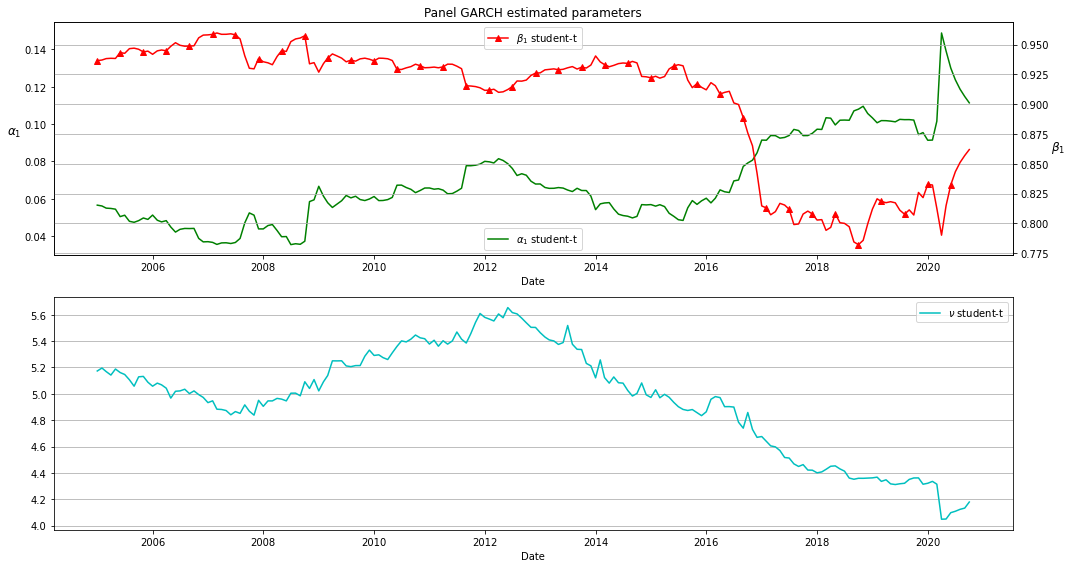

In [167]:
fig, ax = plt.subplots(2,1, figsize = (15,8))

ax[0].legend()
ax1 = ax[0].twinx()
ax[0].plot(pd.to_datetime(params.index), params_t.Alpha, label = r'$\alpha_1$ student-t', color = 'g')
ax1.plot(pd.to_datetime(params.index), params_t.Beta, label = r'$\beta_1$ student-t', color = 'r', marker = '^', markevery = 5)

ax[0].set_xlabel('Date')
ax[0].set_ylabel(r'$\alpha_1$', rotation=0, fontsize=12, labelpad=10)
ax1.set_ylabel(r'$\beta_1$', rotation=0, fontsize=12, labelpad=10)
ax[0].legend(loc = 'lower center')
ax1.legend(loc = 'upper center')

ax[1].plot(pd.to_datetime(params.index), params_t.Nu, label = r'$\nu$ student-t', color = 'c')
ax[1].yaxis.grid()
ax[1].set_xlabel('Date')
ax[1].legend()
plt.title('Panel GARCH estimated parameters')
plt.tight_layout()
plt.grid(True)
#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panel_garch_stud_est_pars.png')
plt.show()

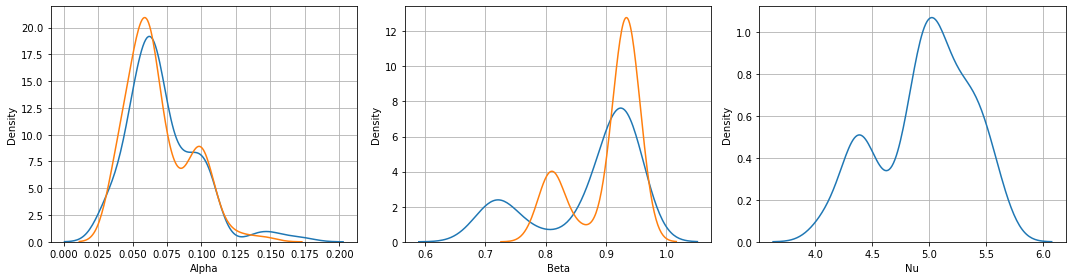

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)

plt.tight_layout()
plt.show()

In [36]:
params_csa = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_CSA/PARAMS_NORM_FINAL.csv')

In [37]:
params_csa.set_index(pd.to_datetime(params_csa.iloc[:, 0]), inplace = True)
params_csa = params_csa.iloc[:, 1:]
params_csa.iloc[105, :] = (params_csa.iloc[104, :] + params_csa.iloc[107, :]) / 2
params_csa.iloc[106, :] = (params_csa.iloc[104, :] + params_csa.iloc[107, :]) / 2

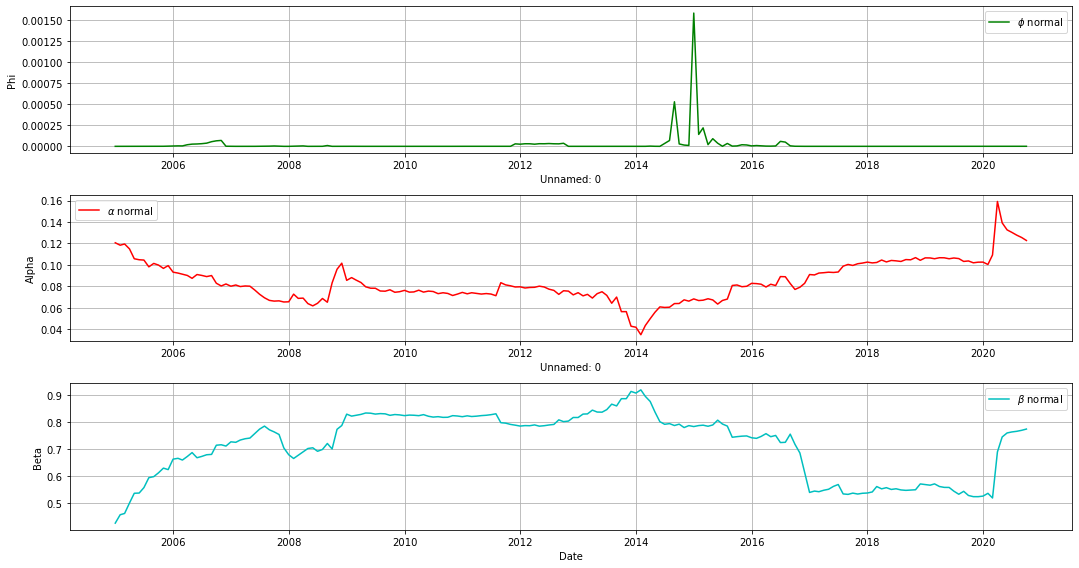

In [38]:
fig, ax = plt.subplots(3, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Phi, label = r'$\phi$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Alpha, label = r'$\alpha$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Beta, label = r'$\beta$ normal', color = 'c', ax = ax[2])
ax[2].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

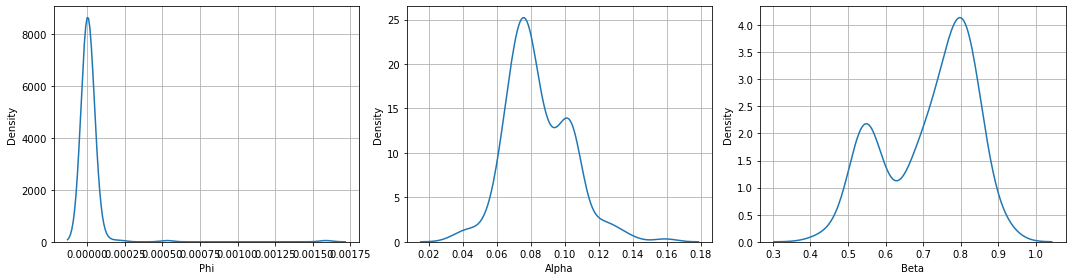

In [39]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))

sns.kdeplot(params_csa.Phi, ax = ax[0], label = r'$\phi$')
ax[0].grid(0.2)

sns.kdeplot(params_csa.Alpha, ax = ax[1], label = r'$\alpha$')
ax[1].grid(0.2)

sns.kdeplot(params_csa.Beta, ax = ax[2], label = r'$\beta$')
ax[2].grid(0.2)

plt.tight_layout()
plt.show()

## Panel GARCH-MIDAS

In [69]:
midas_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_midas.csv')
norm_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_norm.csv')
stud_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_stud.csv')

In [70]:
midas_pars.set_index(pd.to_datetime(midas_pars.iloc[:, 0]), inplace = True)
midas_pars = midas_pars.iloc[:, 1:]
norm_pars.set_index(pd.to_datetime(norm_pars.iloc[:, 0]), inplace = True)
norm_pars = norm_pars.iloc[:, 1:]
stud_pars.set_index(pd.to_datetime(stud_pars.iloc[:, 0]), inplace = True)
stud_pars = stud_pars.iloc[:, 1:]
stud_pars.loc[stud_pars.index[102]] = stud_pars.loc[stud_pars.index[101]]

## MIDAS parameters:

## KDE plot of the $\beta$ coefficients

In [82]:
labels = [r'$\beta_0$', 'VIX', 'NFCI', 'CFNAI', r'$\Delta$ IP',  r'$\Delta$ HOUST', 'DTB3', 'SOYC', 'BAA10Y', 'INFLATION', 'UNRATE',  r'$\Delta$ PPI',  r'$\Delta$ M2',  r'$\Delta$ CSH']

In [89]:
betas = [0,1,3,5,7,9,11,13,15,17,19,21,23,25]
thetas = [2,4,6,8,10,12,14,16,18,20,22,24,26]

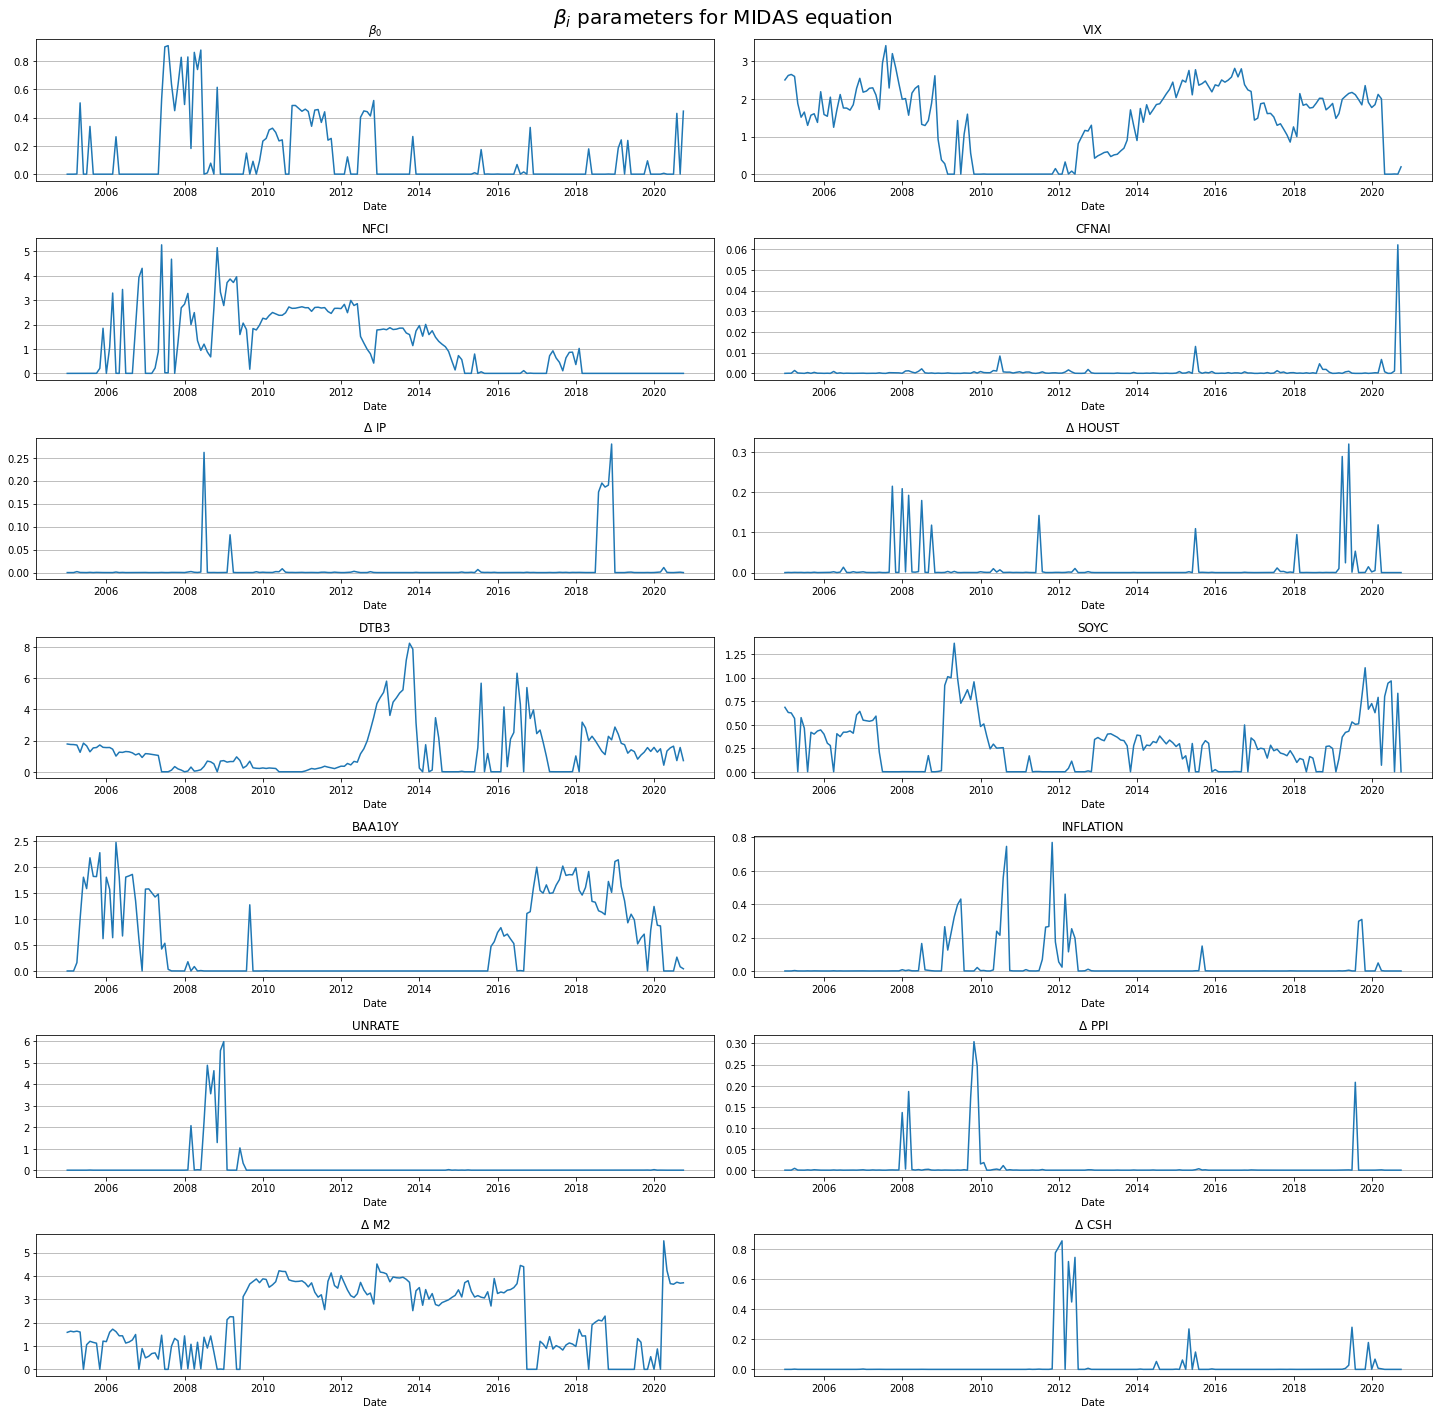

In [92]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))
fig.suptitle(r'$\beta_i$ parameters for MIDAS equation', fontsize = 20)
for i in range(7):
    sns.lineplot(midas_pars.index, midas_pars.iloc[:, betas[i*2]].values, ax = ax[i][0])
    ax[i][0].yaxis.grid()
    ax[i][0].set_xlabel('Date')
    ax[i][0].set_title(labels[i*2])

    sns.lineplot(midas_pars.index, midas_pars.iloc[:, betas[i*2 + 1]].values, ax = ax[i][1])
    ax[i][1].yaxis.grid()
    ax[i][1].set_xlabel('Date')
    ax[i][1].set_title(labels[i*2 + 1])

plt.tight_layout()
#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panel_midas_est_beta_pars.png')
plt.show()

## KDE plot of the $\theta$ parameters:

In [107]:
for i in thetas:
    sg = midas_pars.iloc[:, i]
    sg[sg.values >= 500] = 500
    midas_pars.iloc[:, i] = sg

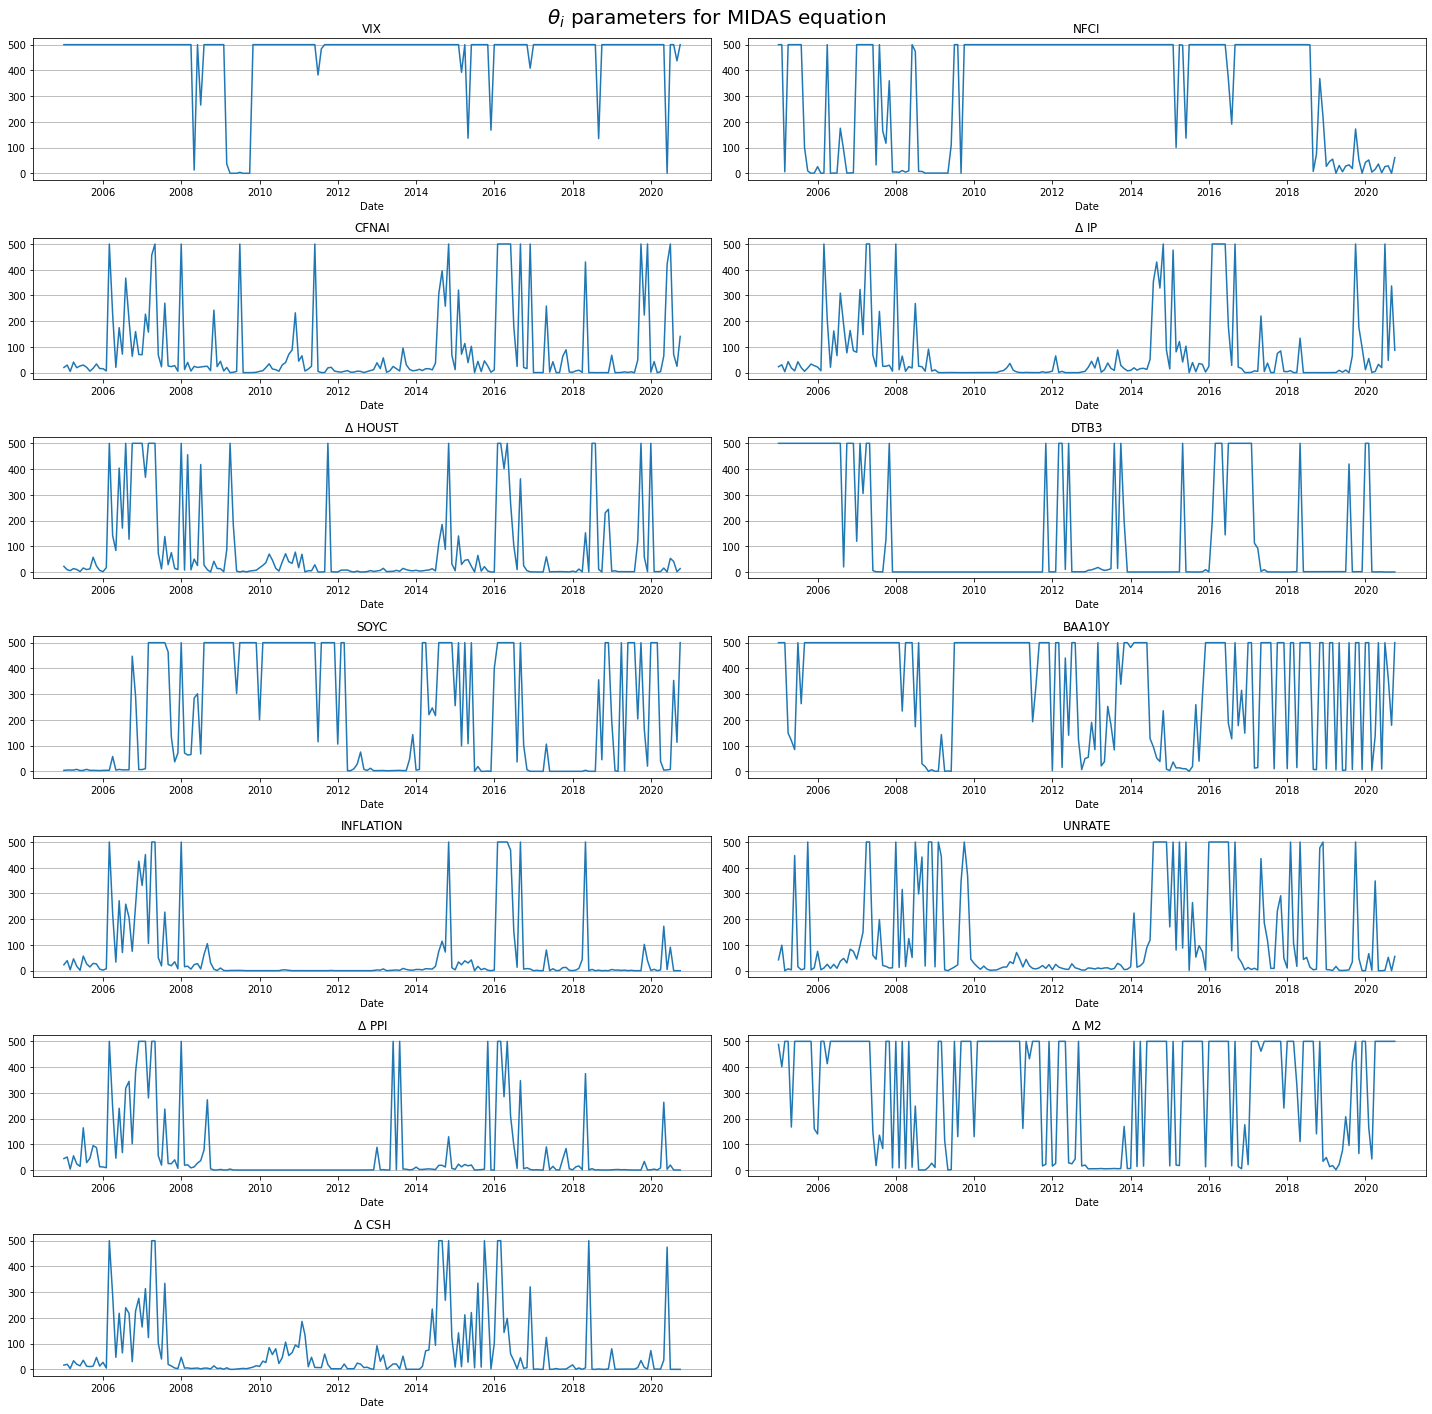

In [108]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))
fig.suptitle(r'$\theta_i$ parameters for MIDAS equation', fontsize = 20)
for i in range(7):
    sns.lineplot(midas_pars.index, midas_pars.iloc[:, thetas[i*2]].values, ax = ax[i][0])
    ax[i][0].yaxis.grid()
    ax[i][0].set_xlabel('Date')
    ax[i][0].set_title(labels[i*2 + 1])
    
    try:
        sns.lineplot(midas_pars.index, midas_pars.iloc[:, thetas[i*2 + 1]].values, ax = ax[i][1])
        ax[i][1].yaxis.grid()
        ax[i][1].set_xlabel('Date')
        ax[i][1].set_title(labels[i*2 + 2])
    except:
        ax[i][1].axis('off')
plt.tight_layout()
#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panel_midas_est_theta_pars.png')
plt.show()

## Desctiptive statistics of the estimated parameters of the MIDAS equation:

In [118]:
lbs = [r'$\beta_0$', 
       r'$\beta_{VIX}$', r'$\theta_{VIX}$', 
       r'$\beta_{NFCI}$', r'$\theta_{NFCI}$', 
       r'$\beta_{CFNAI}$', r'$\theta_{CFNAI}$',
       r'$\beta_{\Delta IP}$', r'$\theta_{\Delta IP}$', 
       r'$\beta_{\Delta HOUST}$', r'$\theta_{\Delta HOUST}$',  
       r'$\beta_{DTB3}$', r'$\theta_{DTB3}$',
       r'$\beta_{SOYC}$', r'$\theta_{SOYC}$',
       r'$\beta_{BAA10Y}$', r'$\theta_{BAA10Y}$', 
       r'$\beta_{INFLATION}$', r'$\theta_{INFLATION}$', 
       r'$\beta_{UNRATE}$', r'$\theta_{UNRATE}$',
       r'$\beta_{\Delta PPI}$', r'$\theta_{\Delta PPI}$', 
       r'$\beta_{\Delta M2}$', r'$\theta_{\Delta M2}$',  
       r'$\beta_{\Delta CSH}$', r'$\theta_{\Delta CSH}$']
midas_pars.columns = lbs
pd.set_option('display.float_format', lambda x: '%.3f' % x)
midas_desc = midas_pars.describe().T
midas_desc#.to_csv('C:/Users/peter/Desktop/volatility-forecasting/results/panel_midas_desc_stats.csv')

,count,mean,std,min,25%,50%,75%,max
$\beta_0$,190.000,0.123,0.221,0.000,0.000,0.000,0.185,0.910
$\beta_{VIX}$,190.000,1.408,0.931,0.000,0.516,1.631,2.143,3.412
$\theta_{VIX}$,190.000,465.062,119.194,0.005,500.000,500.000,500.000,500.000
$\beta_{NFCI}$,190.000,1.163,1.285,0.000,0.000,0.800,2.181,5.267
$\theta_{NFCI}$,190.000,339.100,221.789,0.000,43.462,500.000,500.000,500.000
$\beta_{CFNAI}$,190.000,0.001,0.005,0.000,0.000,0.000,0.000,0.062
$\theta_{CFNAI}$,190.000,88.756,152.055,0.000,4.645,20.172,69.518,500.000
$\beta_{\Delta IP}$,190.000,0.008,0.039,0.000,0.000,0.000,0.000,0.280
$\theta_{\Delta IP}$,190.000,74.894,140.399,0.001,0.592,15.074,64.989,500.000
$\beta_{\Delta HOUST}$,190.000,0.012,0.045,0.000,0.000,0.000,0.001,0.319


## GARCH (Normal) parameters:

## KDE and time-series plot of the estimated $\alpha$ and $\beta$ parameters:

#### NOTE: $\beta$ itt is megjelenik, így a szakdolgozat leírásban a MIDAS-os résznél más görög betűre kell áttérni, hogy ne legyen benne kavarodás.

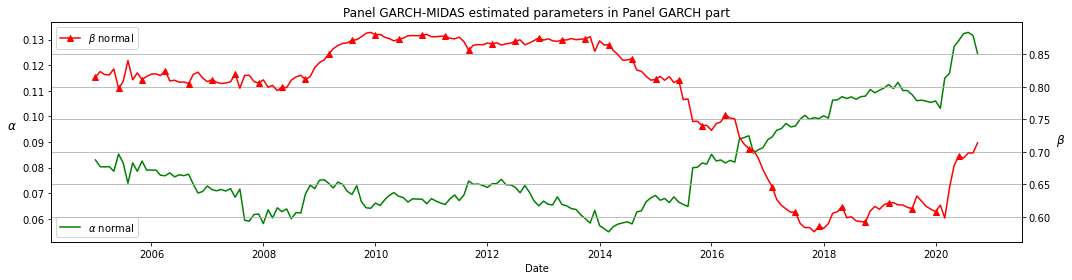

In [165]:
fig, ax1 = plt.subplots(figsize = (15,4))

ax2 = ax1.twinx()
ax1.plot(pd.to_datetime(params.index), norm_pars.iloc[:, 0], label = r'$\alpha$ normal', color = 'g')
ax2.plot(pd.to_datetime(params.index), norm_pars.iloc[:, 1], label = r'$\beta$ normal', color = 'r', marker = '^', markevery = 5)

ax1.set_xlabel('Date')
ax1.set_ylabel(r'$\alpha$', rotation=0, fontsize=12, labelpad=10)
ax2.set_ylabel(r'$\beta$', rotation=0, fontsize=12, labelpad=10)
ax1.legend(loc = 'lower left')
ax2.legend(loc = 'upper left')
plt.title('Panel GARCH-MIDAS estimated parameters in Panel GARCH part')
plt.grid(True)
plt.tight_layout()
#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panel_garchmidas_norm_est_pars.png')
plt.show()

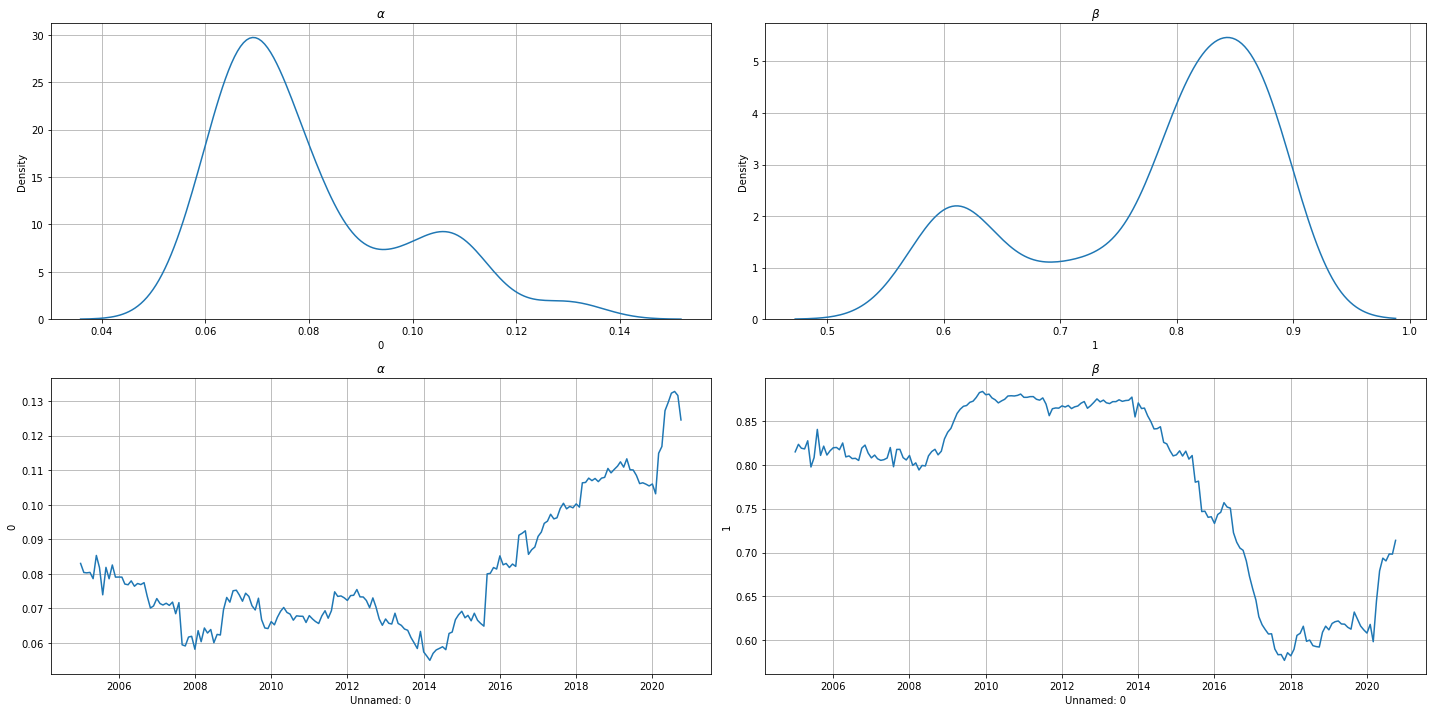

In [52]:
fig, ax = plt.subplots(2, 2, figsize = (20,10))


sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\alpha$')

sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta$')

sns.lineplot(norm_pars.index, norm_pars.iloc[:, 0], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\alpha$')

sns.lineplot(norm_pars.index, norm_pars.iloc[:, 1], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta$')

plt.tight_layout()
plt.show()

## GARCH (Student-t) parameters:

## KDE and time-series plot of the estimated $\alpha$, $\beta$ and $\nu$ parameters:

No handles with labels found to put in legend.


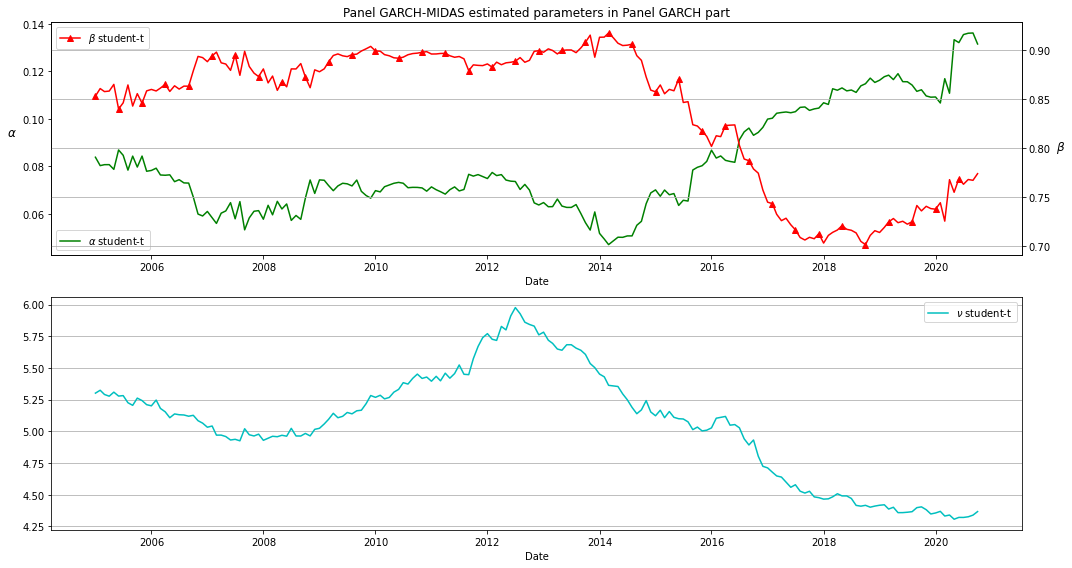

In [163]:
fig, ax = plt.subplots(2,1, figsize = (15,8))

ax[0].legend()
ax1 = ax[0].twinx()
ax[0].plot(pd.to_datetime(params.index), stud_pars.iloc[:, 0], label = r'$\alpha$ student-t', color = 'g')
ax1.plot(pd.to_datetime(params.index), stud_pars.iloc[:, 1], label = r'$\beta$ student-t', color = 'r', marker = '^', markevery = 5)

ax[0].set_xlabel('Date')
ax[0].set_ylabel(r'$\alpha$', rotation=0, fontsize=12, labelpad=10)
ax1.set_ylabel(r'$\beta$', rotation=0, fontsize=12, labelpad=10)
ax[0].legend(loc = 'lower left')
ax1.legend(loc = 'upper left')

ax[1].plot(pd.to_datetime(params.index), stud_pars.iloc[:, 2], label = r'$\nu$ student-t', color = 'c')
ax[1].yaxis.grid()
ax[1].set_xlabel('Date')
ax[1].legend()
plt.title('Panel GARCH-MIDAS estimated parameters in Panel GARCH part')
plt.tight_layout()
plt.grid(True)
#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panel_garchmidas_stud_est_pars.png')
plt.show()

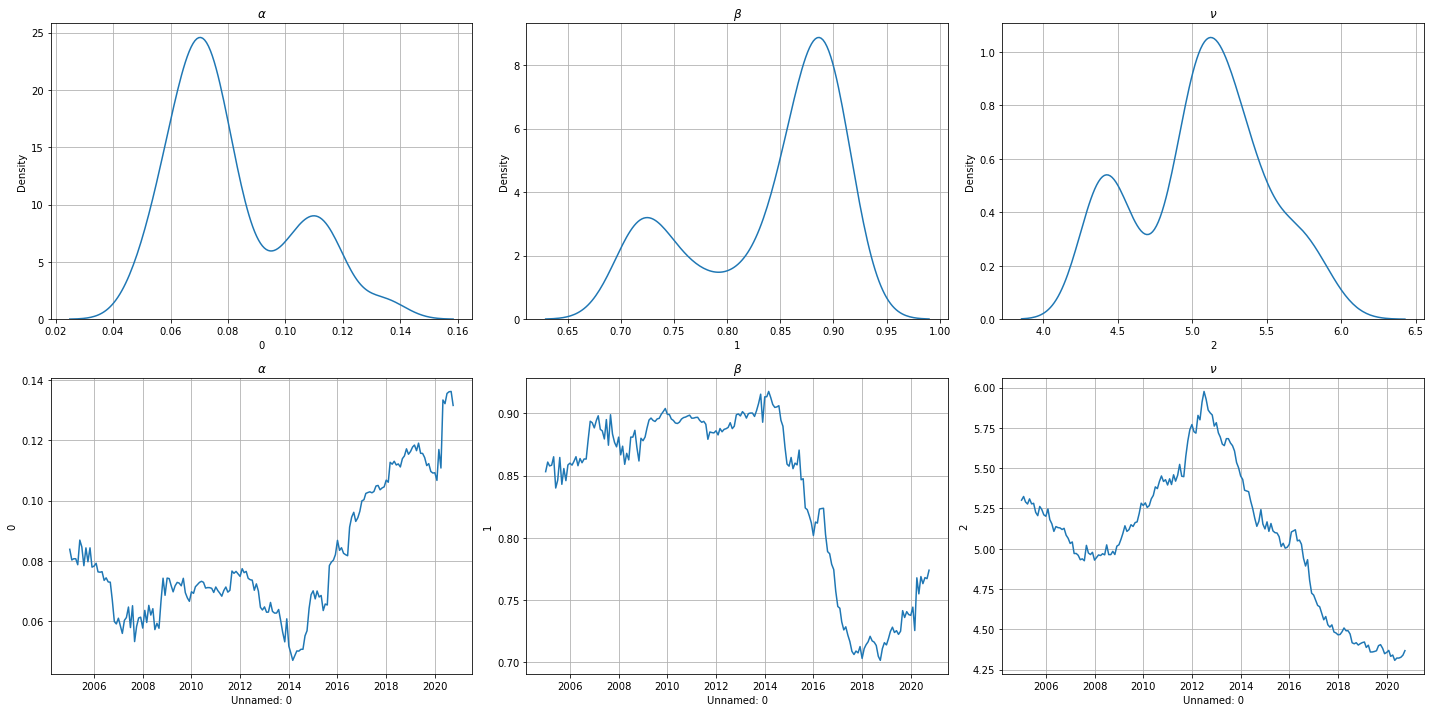

In [53]:
fig, ax = plt.subplots(2, 3, figsize = (20,10))


sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\alpha$')

sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta$')

sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[0][2])
ax[0][2].grid(0.2)
ax[0][2].set_title(r'$\nu$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 0], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\alpha$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 1], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 2], ax = ax[1][2])
ax[1][2].grid(0.2)
ax[1][2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

## Comparison between GARCH (Normal) and GARCH (Student-t) parameters:

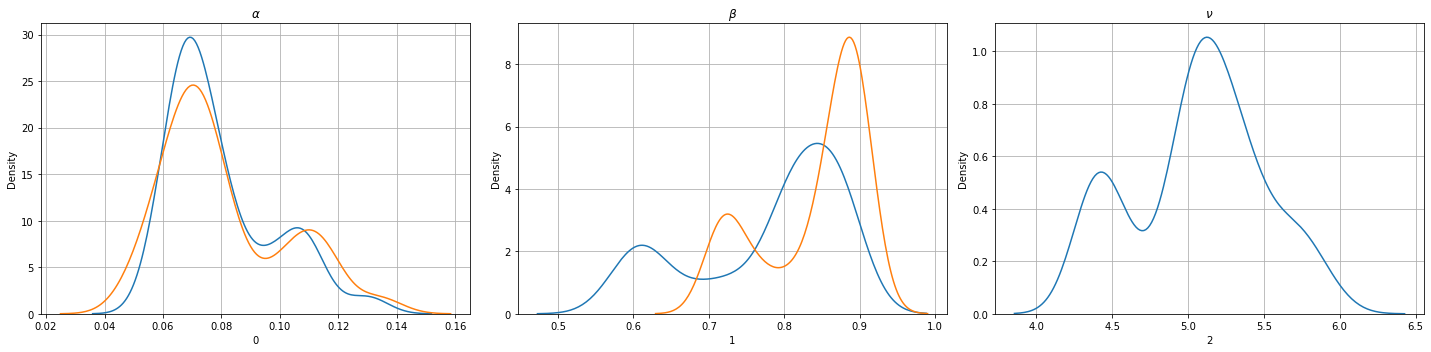

In [54]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))

sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)
ax[0].set_title(r'$\alpha$')

sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)
ax[1].set_title(r'$\beta$')

sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)
ax[2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

## Comparison between plain GARCH parameters and GARCH MIDAS parameters:

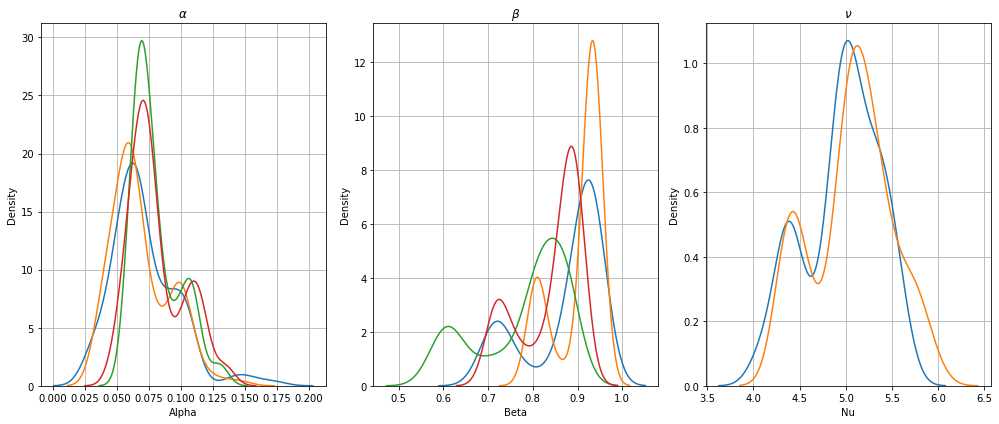

In [55]:
fig, ax = plt.subplots(1, 3, figsize = (14,6))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal G')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t G')
sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ normal GM')
sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ student-t GM')
ax[0].grid(0.2)
ax[0].set_title(r'$\alpha$')

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal G')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t G')
sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ normal GM')
sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ student-t GM')
ax[1].grid(0.2)
ax[1].set_title(r'$\beta$')

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t G')
sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[2], label = r'$\nu$ student-t GM')
ax[2].grid(0.2)
ax[2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

In [141]:
ewma = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_EWMA/params.csv')

In [142]:
ewma = ewma.iloc[:, 1:].T

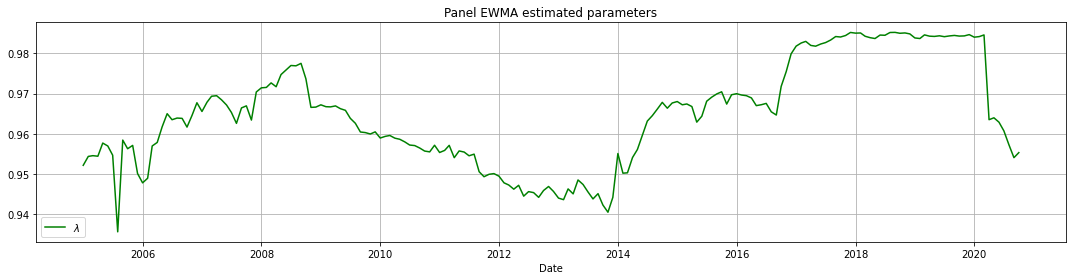

In [145]:
fig, ax1 = plt.subplots(figsize = (15,4))

ax1.plot(pd.to_datetime(params.index), ewma.values, label = r'$\lambda$', color = 'g')

ax1.set_xlabel('Date')
ax1.legend(loc = 'lower left')

plt.title('Panel EWMA estimated parameters')
plt.grid(True)
plt.tight_layout()
#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panel_ewma_pars.png')
plt.show()

In [157]:
pgcsa = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/pgarch_csa/params_est.csv')
pgcsa = pgcsa.iloc[:-1, :]

No handles with labels found to put in legend.


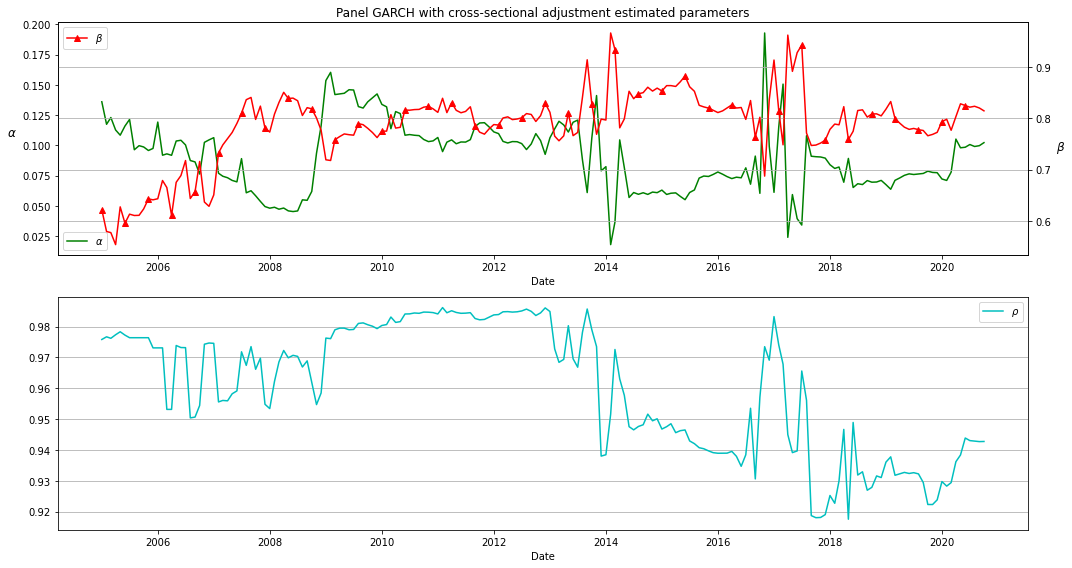

In [172]:
fig, ax = plt.subplots(2,1, figsize = (15,8))

ax[0].legend()
ax1 = ax[0].twinx()
ax[0].plot(pd.to_datetime(params.index), pgcsa.alpha, label = r'$\alpha$', color = 'g')
ax1.plot(pd.to_datetime(params.index), pgcsa.beta, label = r'$\beta$', color = 'r', marker = '^', markevery = 5)

ax[0].set_xlabel('Date')
ax[0].set_ylabel(r'$\alpha$', rotation=0, fontsize=12, labelpad=10)
ax1.set_ylabel(r'$\beta$', rotation=0, fontsize=12, labelpad=10)
ax[0].legend(loc = 'lower left')
ax1.legend(loc = 'upper left')

ax[1].plot(pd.to_datetime(params.index), pgcsa.rho, label = r'$\rho$', color = 'c')
ax[1].yaxis.grid()
ax[1].set_xlabel('Date')

ax[1].legend()
plt.title('Panel GARCH with cross-sectional adjustment estimated parameters')
plt.tight_layout()
plt.grid(True)
#plt.savefig('C:/Users/peter/Desktop/volatility-forecasting/results/panel_garch_csa_est_pars.png')
plt.show()